In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 5a
url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F%2CTOT&Tid=2008K1%2C2020k1"
data = pd.read_csv(url,sep=';')
data

,CIVILSTAND,TID,INDHOLD
0,Fraskilt,2008K1,428864
1,Fraskilt,2020K1,544588
2,I alt,2008K1,5475791
3,I alt,2020K1,5822763


In [3]:
divorced_filter = data['CIVILSTAND']=="Fraskilt"
divorced = data[divorced_filter]
alle = data[~divorced_filter]
alle = alle.set_index(pd.Index([0,1]))
result = divorced['INDHOLD']/alle['INDHOLD']*100
print(f'Percentage of divorced has grown from {result[0]} to {result[1]} between 2008 and 2020')

Percentage of divorced has grown from 7.832000892656421 to 9.352741988640101 between 2008 and 2020


In [4]:
#5b
city_sizes = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&OMR%C3%85DE=*'
data = pd.read_csv(city_sizes, sep=';')
city_filter = data["OMRÅDE"].str.startswith("0")
city_data = data[~city_filter]
city_data_sorted = city_data.sort_values(by=["INDHOLD"], ascending=False)
biggest5 = city_data_sorted[:5]["OMRÅDE"]
biggest5

2      101 København
84        751 Aarhus
104      851 Aalborg
58        461 Odense
71         630 Vejle
Name: OMRÅDE, dtype: object

In [5]:
#5b
url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&OMR%C3%85DE=101%2C751%2C851%2C461%2C630&CIVILSTAND=U%2CTOT"
data = pd.read_csv(url,sep=";")
top5_filter = data["OMRÅDE"].isin(biggest5)
top5 = data[top5_filter]
top5

,OMRÅDE,CIVILSTAND,TID,INDHOLD
0,101 København,U Ugift,2021K1 2021K1,418133
1,101 København,TOT I alt,2021K1 2021K1,638117
2,751 Aarhus,U Ugift,2021K1 2021K1,211355
3,751 Aarhus,TOT I alt,2021K1 2021K1,352751
4,851 Aalborg,U Ugift,2021K1 2021K1,120287
5,851 Aalborg,TOT I alt,2021K1 2021K1,219487
6,461 Odense,U Ugift,2021K1 2021K1,113374
7,461 Odense,TOT I alt,2021K1 2021K1,205509
8,630 Vejle,U Ugift,2021K1 2021K1,55338
9,630 Vejle,TOT I alt,2021K1 2021K1,116992


In [6]:
#5b
all_top5 = top5[top5["CIVILSTAND"] == "TOT I alt"]
unmarried_top5 = top5.loc[top5["CIVILSTAND"] == "U Ugift"].copy()
unmarried_top5["PERCENT"] = unmarried_top5["INDHOLD"]/all_top5["INDHOLD"].tolist()
sorted_data = unmarried_top5 [["OMRÅDE", "PERCENT"]].sort_values("PERCENT", ascending=False)
sorted_data

,OMRÅDE,PERCENT
0,101 København,0.655261
2,751 Aarhus,0.599162
6,461 Odense,0.551674
4,851 Aalborg,0.548037
8,630 Vejle,0.473007


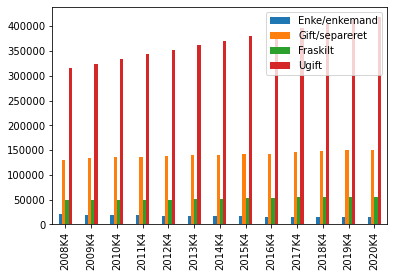

In [7]:
#5c
url= "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&ALDER=*%2C%2CIALT&CIVILSTAND=U%2CG%2CE%2CF%2CTOT&K%C3%98N=TOT&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K4&OMR%C3%85DE=101%2C851%2C751%2C561%2C461%2C000"
data = pd.read_csv(url,sep=";")
TID=sorted(list(set(data["TID"])))
data_cph=data[data["OMRÅDE"].isin(["København"])]
total_age=data_cph[data_cph["ALDER"].isin(["I alt"])]
cph_total_age=total_age[~total_age["CIVILSTAND"].isin(["I alt"])]

data_by_status={}

status=set(cph_total_age["CIVILSTAND"])

for st in status:
    ctz=cph_total_age[cph_total_age["CIVILSTAND"].isin([st])].sort_values(by="TID")
    citizens=pd.Series(tuple(ctz["INDHOLD"]),index=TID)

    data_by_status[st]=citizens

data_by_status
result=pd.concat(data_by_status, axis=1)
result

result.plot.bar()

<Figure size 432x288 with 0 Axes>

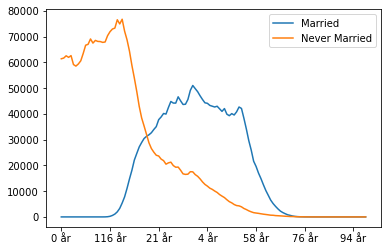

In [8]:
#5d
url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&ALDER=*%2C%2CIALT&CIVILSTAND=U%2CG%2CE%2CF%2CTOT&K%C3%98N=TOT&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K4&OMR%C3%85DE=101%2C851%2C751%2C561%2C461%2C000"
data = pd.read_csv(url,sep=";")

age=list(set(data["ALDER"]))
age.remove("I alt")
ages=sorted(age)

ages_years=data[data["ALDER"].isin(ages)]
ages_data=ages_years[ages_years["TID"].isin(["2020K4"])]
ages_dk=ages_data[ages_data["OMRÅDE"].isin(["Hele landet"])]


ugift=ages_dk[ages_dk["CIVILSTAND"].isin(["Ugift"])].iloc[:,[0,5]]
_ugift=pd.DataFrame(data=list(ugift["INDHOLD"]),index=ages,columns=["Never Married"])

gift=ages_dk[ages_dk["CIVILSTAND"].isin(["Gift/separeret"])].iloc[:,[0,5]]
_gift=pd.DataFrame(data=list(gift["INDHOLD"]),index=ages,columns=["Married"])



x=pd.concat([_gift,_ugift],axis=1)
plt.figure();
x.plot()